In [24]:
import pandas as pd
import tensorflow as tf

from window import WindowGenerator
import utils

In [25]:
def train_case(case_df, model, in_width, out_steps, max_epochs):
    """ Train model for given case df. """
    
    outlets = [ col for col in case_df.columns.values if col.startswith('outlet') ]
    column_indices = { name: i for i, name in enumerate(case_df.columns) }

    train_df, test_df, val_df = utils.train_test_val_split(case_df, test_size=0, val_size=0.2)
    # train_df, test_df, val_df = normalize_datasets(train_df, test_df, val_df)

    label_columns = outlets

    multi_window = WindowGenerator(
        train_df=train_df,
        val_df=val_df,
        test_df=test_df,
        input_width=in_width,
        label_width=out_steps,
        shift=out_steps,
        label_columns=label_columns
    )

    history = model.fit(
        multi_window.train,
        epochs=max_epochs,
        validation_data=multi_window.val,
        verbose=0
        # callbacks=[early_stopping]
    )

    return multi_window, history

# Dataset

In [26]:
case_1 = pd.read_csv("../datasets/case_1.csv", index_col='Time')
case_2 = pd.read_csv("../datasets/case_2.csv", index_col='Time')
case_3 = pd.read_csv("../datasets/case_3.csv", index_col='Time')
case_4 = pd.read_csv("../datasets/case_4.csv", index_col='Time')
case_5 = pd.read_csv("../datasets/case_5.csv", index_col='Time')

In [27]:
outlets = [ col for col in case_1.columns.values if col.startswith('outlet') ]
label_columns = outlets
num_features = case_1.shape[1]

In [28]:
column_indices = { name: i for i, name in enumerate(case_1.columns) }

# Model Creation

In [29]:
IN_WIDTH = 18
OUT_STEPS = 18
MAX_EPOCHS = 20
features_size = len(label_columns)

In [30]:
print(f"Using {IN_WIDTH*5}s of data to predict {OUT_STEPS*5}s.")
print(f"Using {IN_WIDTH*5/60}min of data to predict {OUT_STEPS*5/60}min.")

Using 90s of data to predict 90s.
Using 1.5min of data to predict 1.5min.


In [31]:
CONV_WIDTH = 3 # default 3
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*features_size,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, features_size])
])

multi_conv_model.compile(loss=tf.losses.MeanSquaredError(),
                         optimizer=tf.optimizers.Adam(),
                         metrics=[tf.metrics.RootMeanSquaredError()])

# history = compile_and_fit(multi_conv_model, multi_window)

# IPython.display.clear_output()

# multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val)
# multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0)
# multi_window.plot(multi_conv_model)

## Case 2

In [32]:
window, history = train_case(
    case_df=case_2,
    model=multi_conv_model,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS
)

2022-09-26 17:57:55.490882: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-09-26 17:57:55.973809: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


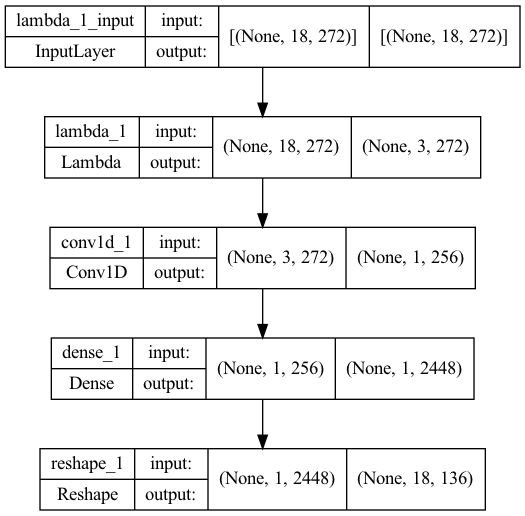

In [33]:
tf.keras.utils.plot_model(multi_conv_model, "../plots/models/multi_conv_model.png", show_shapes=True)

label_col_index 135
label_col_index 135
label_col_index 135


2022-09-26 17:58:04.600764: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


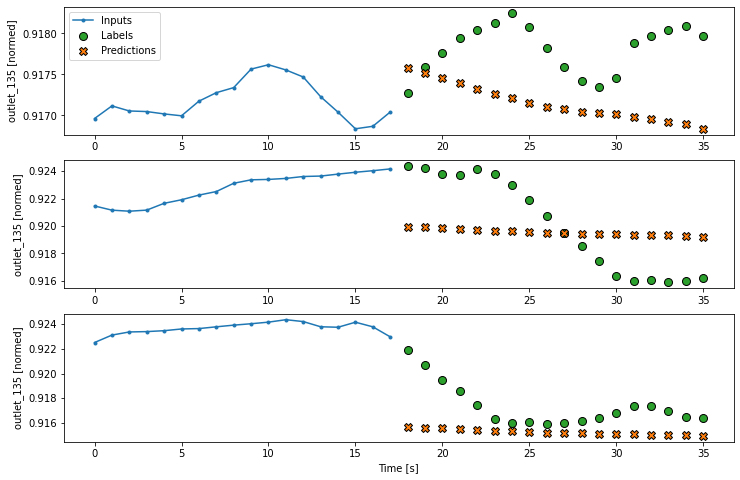

In [34]:
window.plot(multi_conv_model, plot_col="outlet_135")

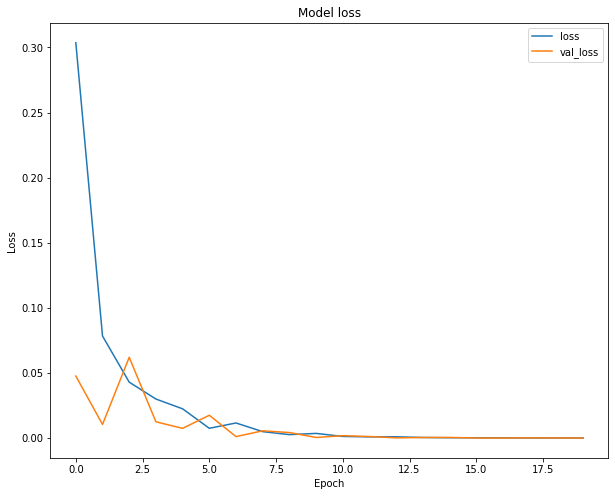

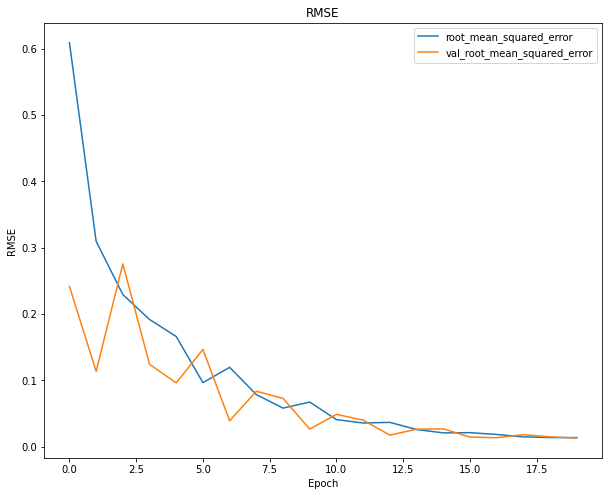

In [35]:
utils.plot_losses(history=history)

## Case 3

In [36]:
window, history = train_case(
    case_df=case_3,
    model=multi_conv_model,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS
)

label_col_index 135
label_col_index 135
label_col_index 135


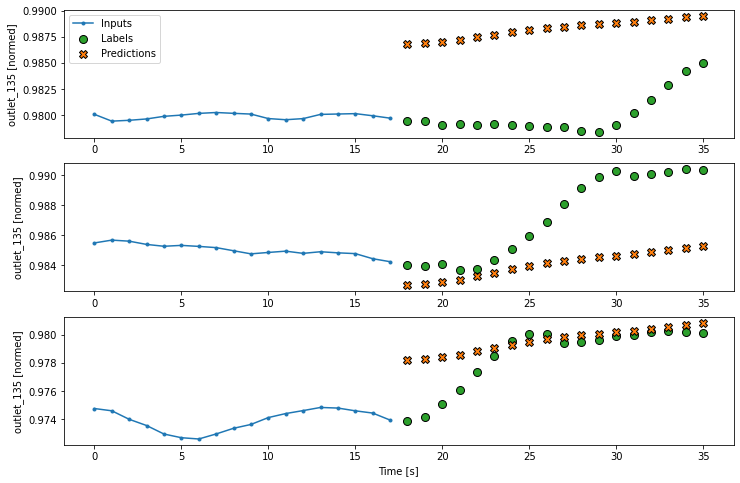

In [37]:
window.plot(multi_conv_model, plot_col="outlet_135")

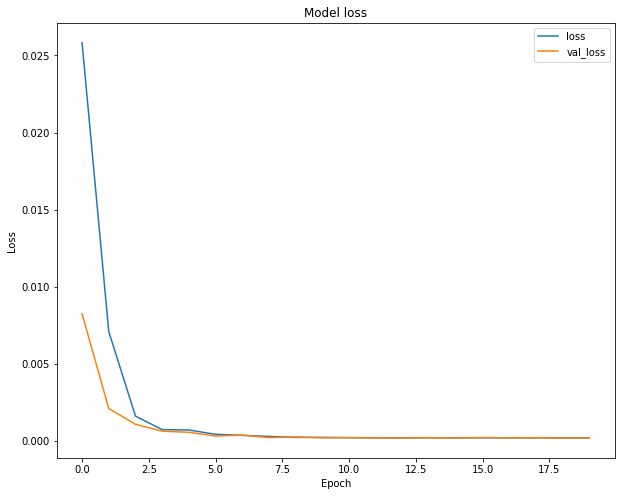

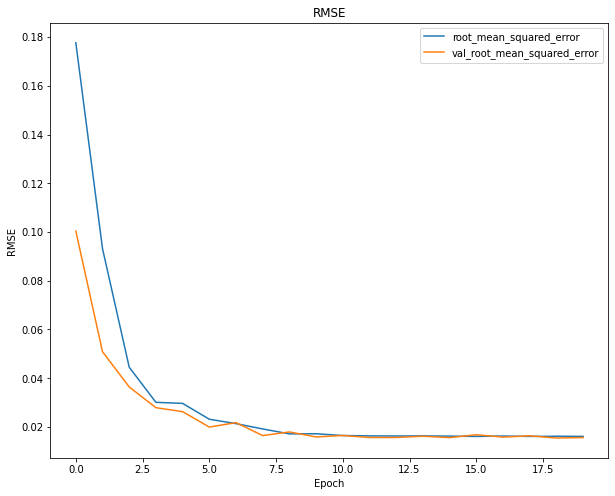

In [38]:
utils.plot_losses(history=history)

## Case 4

In [39]:
window, history = train_case(
    case_df=case_4,
    model=multi_conv_model,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS
)

label_col_index 135
label_col_index 135
label_col_index 135


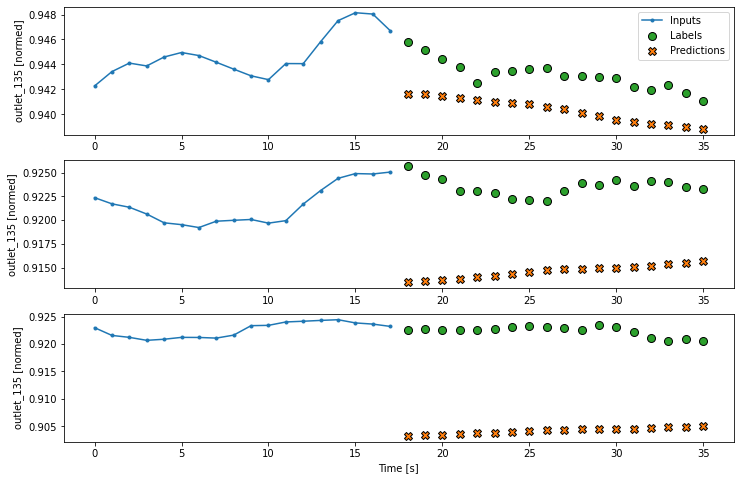

In [40]:
window.plot(multi_conv_model, plot_col="outlet_135")

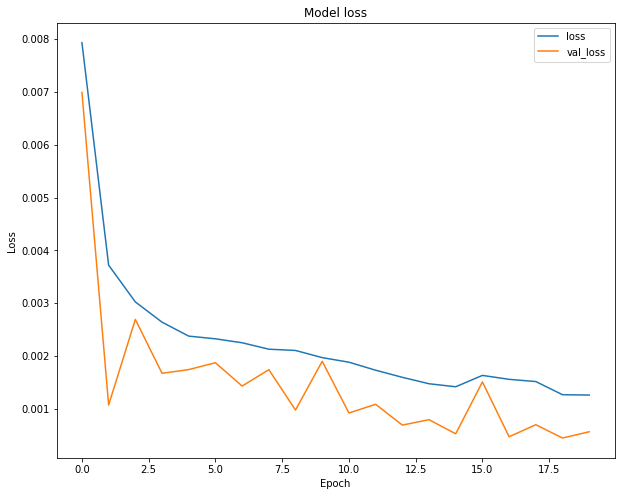

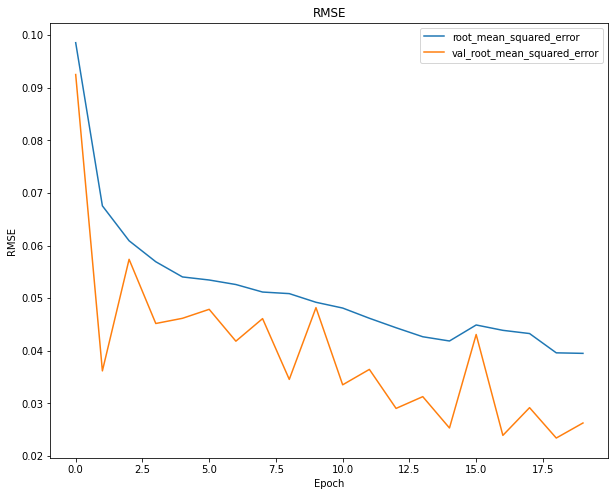

In [41]:
utils.plot_losses(history=history)

## Case 5

In [42]:
window, history = train_case(
    case_df=case_5,
    model=multi_conv_model,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS
)

label_col_index 135
label_col_index 135
label_col_index 135


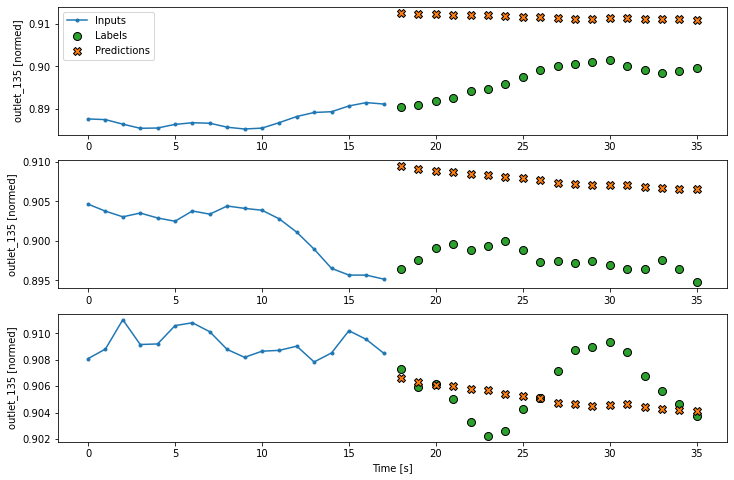

In [43]:
window.plot(multi_conv_model, plot_col="outlet_135")

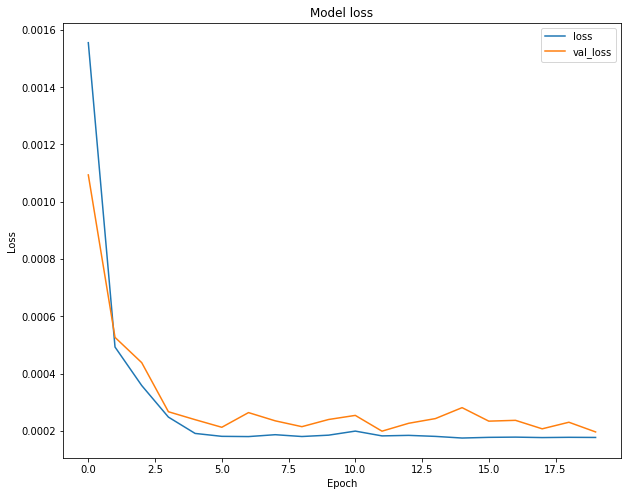

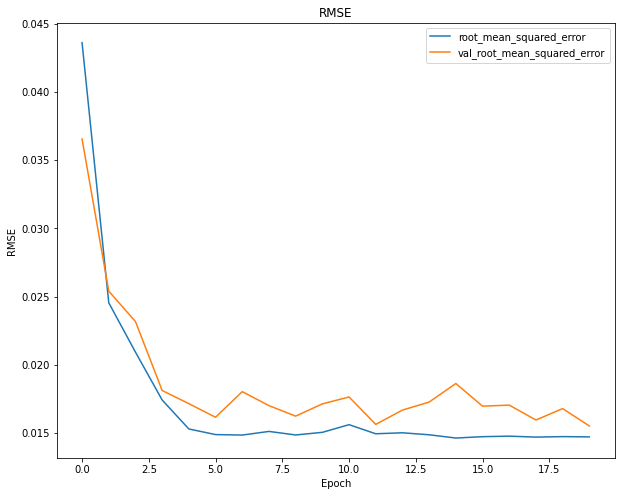

In [44]:
utils.plot_losses(history=history)

## Case 1 (Testing)

In [45]:
outlets = [ col for col in case_1.columns.values if col.startswith('outlet') ]
column_indices = { name: i for i, name in enumerate(case_1.columns) }

In [46]:
window = WindowGenerator(
    train_df=case_1,
    input_width=IN_WIDTH,
    label_width=OUT_STEPS,
    shift=OUT_STEPS,
    label_columns=outlets
)

multi_conv_model.evaluate(window.train) # testing

5/5 [==============================] - 0s 9ms/step - loss: 0.0122 - root_mean_squared_error: 0.1221


[0.012180591002106667, 0.12205338478088379]